In [1]:
import netket as nk
import jax
import jax.numpy as jnp
import numpy as np
from time import time
from Models import RestrictedBoltzmannMachine
from itertools import product
from matplotlib import pyplot as plt
from pathlib import Path
import pickle
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
image_path = Path('./images/7-NChainsOptimization')
res_path = Path('./Simulations/7-NChainsOptimization')

In [3]:
cpu = jax.devices('cpu')[0]
gpu = jax.devices('gpu')[0]
cpu, gpu

(CpuDevice(id=0), CudaDevice(id=0))

In [4]:
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 300

In [5]:
n = 8 * 128
extent = [3, 3]
alpha_list = [2, 5]
samples_list = [n, 6 * n]
gpu_results = {}
dn = 8
n_chains_list = np.arange(8, 15 * dn, dn).tolist()

In [5]:
with jax.default_device(gpu):
    for alpha, n_samples in product(alpha_list, samples_list):
        t_res = []
        print(f'alpha: {alpha}, n_samples: {n_samples}')
        for n_chains in n_chains_list:
            honey = nk.graph.Honeycomb(extent=extent, pbc=True)
            hilbert = nk.hilbert.Spin(s=1/2, N=honey.n_nodes, total_sz=Sz)
            hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
            sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains_per_rank=n_chains)
            optimizer = nk.optimizer.Sgd(learning_rate=lr)
            sr = nk.optimizer.SR(diag_shift=ds, holomorphic=True)
            rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.complex64)
            vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
            gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                        preconditioner=sr, variational_state=vstate)
            
            start = time()
            gs.run(n_iter=n_iter, show_progress=False)
            print(f'N_chains: {n_chains}')
            print(f'Time: {(t := time()-start):.3f} seconds')
            t_res.append(t)
            print(f'Computed energy: {gs.energy.mean.real:.2f}')
        gpu_results[(alpha, n_samples)] = t_res

alpha: 2, n_samples: 1024
N_chains: 8
Time: 111.871 seconds
Computed energy: -40.15
N_chains: 16
Time: 83.231 seconds
Computed energy: -40.27


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=24, increased to 1032 (1032 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 24
Time: 91.284 seconds
Computed energy: -40.05
N_chains: 32
Time: 69.318 seconds
Computed energy: -40.13


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=40, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 40
Time: 85.100 seconds
Computed energy: -40.23


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=48, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 48
Time: 72.746 seconds
Computed energy: -40.21


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=56, increased to 1064 (1064 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 56
Time: 68.532 seconds
Computed energy: -40.12
N_chains: 64
Time: 64.762 seconds
Computed energy: -40.20


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=72, increased to 1080 (1080 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 72
Time: 70.936 seconds
Computed energy: -40.18


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=80, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 80
Time: 63.644 seconds
Computed energy: -40.19


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=88, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 88
Time: 65.864 seconds
Computed energy: -40.15


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=96, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 96
Time: 64.019 seconds
Computed energy: -40.26


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=104, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 104
Time: 76.406 seconds
Computed energy: -40.23


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=112, increased to 1120 (1120 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 112
Time: 66.919 seconds
Computed energy: -40.25
alpha: 2, n_samples: 6144
N_chains: 8
Time: 573.278 seconds
Computed energy: -40.29
N_chains: 16
Time: 427.370 seconds
Computed energy: -40.28
N_chains: 24
Time: 463.773 seconds
Computed energy: -40.28
N_chains: 32
Time: 345.444 seconds
Computed energy: -40.28


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=40, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 40
Time: 417.617 seconds
Computed energy: -40.31
N_chains: 48
Time: 331.769 seconds
Computed energy: -40.23


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=56, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 56
Time: 319.833 seconds
Computed energy: -40.27
N_chains: 64
Time: 317.302 seconds
Computed energy: -40.27


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=72, increased to 6192 (6192 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 72
Time: 336.499 seconds
Computed energy: -40.30


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=80, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 80
Time: 309.119 seconds
Computed energy: -40.28


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=88, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 88
Time: 316.586 seconds
Computed energy: -40.28
N_chains: 96
Time: 306.751 seconds
Computed energy: -40.27


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=104, increased to 6240 (6240 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 104
Time: 389.402 seconds
Computed energy: -40.28


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=112, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 112
Time: 302.838 seconds
Computed energy: -40.30
alpha: 5, n_samples: 1024
N_chains: 8
Time: 112.392 seconds
Computed energy: -40.26
N_chains: 16
Time: 88.427 seconds
Computed energy: -40.24


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=24, increased to 1032 (1032 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 24
Time: 85.852 seconds
Computed energy: -40.25
N_chains: 32
Time: 79.318 seconds
Computed energy: -40.20


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=40, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 40
Time: 81.789 seconds
Computed energy: -40.32


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=48, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 48
Time: 91.441 seconds
Computed energy: -40.29


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=56, increased to 1064 (1064 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 56
Time: 79.109 seconds
Computed energy: -40.23
N_chains: 64
Time: 80.263 seconds
Computed energy: -40.31


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=72, increased to 1080 (1080 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 72
Time: 86.420 seconds
Computed energy: -40.32


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=80, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 80
Time: 81.516 seconds
Computed energy: -40.24


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=88, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 88
Time: 107.610 seconds
Computed energy: -40.27


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=96, increased to 1056 (1056 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 96
Time: 106.653 seconds
Computed energy: -40.29


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=104, increased to 1040 (1040 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 104
Time: 104.974 seconds
Computed energy: -40.20


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=1024 (1024 per device/MPI rank) does not divide n_chains=112, increased to 1120 (1120 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 112
Time: 115.052 seconds
Computed energy: -40.20
alpha: 5, n_samples: 6144
N_chains: 8
Time: 612.943 seconds
Computed energy: -40.32
N_chains: 16
Time: 463.268 seconds
Computed energy: -40.31
N_chains: 24
Time: 436.895 seconds
Computed energy: -40.34
N_chains: 32
Time: 411.522 seconds
Computed energy: -40.32


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=40, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 40
Time: 400.395 seconds
Computed energy: -40.33
N_chains: 48
Time: 460.542 seconds
Computed energy: -40.33


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=56, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 56
Time: 383.234 seconds
Computed energy: -40.30
N_chains: 64
Time: 408.859 seconds
Computed energy: -40.33


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=72, increased to 6192 (6192 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 72
Time: 421.363 seconds
Computed energy: -40.32


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=80, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 80
Time: 415.034 seconds
Computed energy: -40.33


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=88, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 88
Time: 556.174 seconds
Computed energy: -40.31
N_chains: 96
Time: 551.144 seconds
Computed energy: -40.32


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=104, increased to 6240 (6240 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 104
Time: 562.802 seconds
Computed energy: -40.35


/home/yelonek/project/venv/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:248: UserWarning: n_samples=6144 (6144 per device/MPI rank) does not divide n_chains=112, increased to 6160 (6160 per device/MPI rank)
  self.n_samples = n_samples


N_chains: 112
Time: 563.962 seconds
Computed energy: -40.34


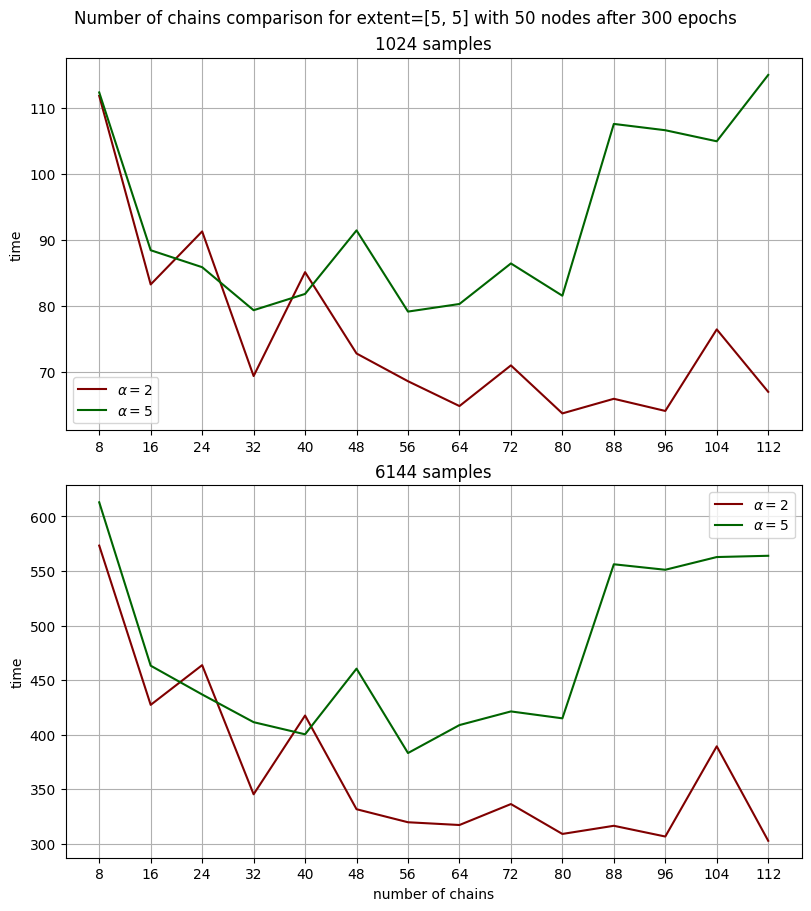

In [27]:
colors = ['maroon', 'maroon', 'darkgreen', 'darkgreen']
figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(8, 9))
for ((alpha, n_samples), times), ax, color in zip(gpu_results.items(), 2*[axes[0], axes[1]], colors):
    ax.plot(n_chains_list, times, label=f'$\\alpha={alpha}$', color=color)
axes[0].set(xticks=n_chains_list, ylabel='time', title=f'{samples_list[0]} samples')
axes[1].set(xticks=n_chains_list, xlabel='number of chains', ylabel='time',
            title=f'{samples_list[1]} samples')
for ax in figure.axes:
    ax.legend()
    ax.grid()
figure.suptitle(f'Number of chains comparison for extent={extent} with {honey.n_nodes} nodes after {n_iter} epochs')
figure.savefig(image_path / f'NodesGpuExtent{extent}.png')

In [49]:
total_result = {tuple([3, 3]): gpu_results}

In [30]:
gpu_results2 = {}
extent = [5, 5]
n_iter = 150

In [31]:
with jax.default_device(gpu):
    for alpha, n_samples in product(alpha_list, samples_list):
        t_res = []
        print(f'alpha: {alpha}, n_samples: {n_samples}')
        for n_chains in n_chains_list:
            honey = nk.graph.Honeycomb(extent=extent, pbc=True)
            hilbert = nk.hilbert.Spin(s=1/2, N=honey.n_nodes, total_sz=Sz)
            hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
            sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains_per_rank=n_chains)
            optimizer = nk.optimizer.Sgd(learning_rate=lr)
            sr = nk.optimizer.SR(diag_shift=ds, holomorphic=True)
            rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.complex64)
            vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
            gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                        preconditioner=sr, variational_state=vstate)
            
            start = time()
            gs.run(n_iter=n_iter, show_progress=False)
            print(f'N_chains: {n_chains}')
            print(f'Time: {(t := time()-start):.3f} seconds')
            t_res.append(t)
            print(f'Computed energy: {gs.energy.mean.real:.2f}')
        gpu_results2[(alpha, n_samples)] = t_res

alpha: 2, n_samples: 1024
N_chains: 8
Time: 169.907 seconds
Computed energy: -107.05
N_chains: 16
Time: 130.218 seconds
Computed energy: -106.83
N_chains: 24
Time: 140.208 seconds
Computed energy: -106.75
N_chains: 32
Time: 108.130 seconds
Computed energy: -106.98
N_chains: 40
Time: 107.658 seconds
Computed energy: -107.26
N_chains: 48
Time: 118.512 seconds
Computed energy: -107.20
N_chains: 56
Time: 121.087 seconds
Computed energy: -107.14
N_chains: 64
Time: 117.474 seconds
Computed energy: -107.11
N_chains: 72
Time: 130.049 seconds
Computed energy: -107.13
N_chains: 80
Time: 119.689 seconds
Computed energy: -107.09
N_chains: 88
Time: 148.212 seconds
Computed energy: -107.02
N_chains: 96
Time: 149.549 seconds
Computed energy: -107.28
N_chains: 104
Time: 163.796 seconds
Computed energy: -107.12
N_chains: 112
Time: 186.070 seconds
Computed energy: -106.86
alpha: 2, n_samples: 6144
N_chains: 8
Time: 1019.395 seconds
Computed energy: -108.20
N_chains: 16
Time: 753.599 seconds
Computed ene

In [50]:
total_result[tuple(extent)] = gpu_results2

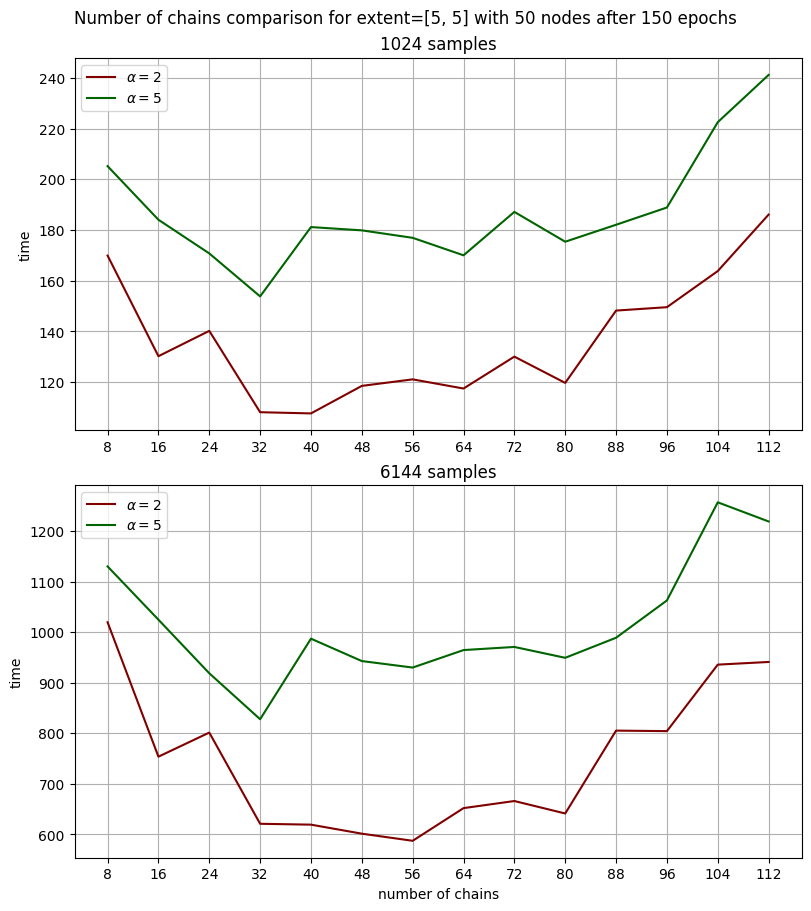

In [34]:
colors = ['maroon', 'maroon', 'darkgreen', 'darkgreen']
figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(8, 9))
for ((alpha, n_samples), times), ax, color in zip(gpu_results2.items(), 2*[axes[0], axes[1]], colors):
    ax.plot(n_chains_list, times, label=f'$\\alpha={alpha}$', color=color)
axes[0].set(xticks=n_chains_list, ylabel='time', title=f'{samples_list[0]} samples')
axes[1].set(xticks=n_chains_list, xlabel='number of chains', ylabel='time',
            title=f'{samples_list[1]} samples')
for ax in figure.axes:
    ax.legend()
    ax.grid()
figure.suptitle(f'Number of chains comparison for extent={extent} with {honey.n_nodes} nodes after {n_iter} epochs')
figure.savefig(image_path / f'NodesGpuExtent{extent}.png')

In [51]:
with open(res_path / f'GpuNChains.pkl', 'wb') as file:
    pickle.dump(total_result, file)

In [54]:
with open(res_path / f'GpuNChains.pkl', 'rb') as file:
    test_read =  pickle.load(file)

Testing CPU

In [6]:
extent = [3, 3]
cpu_results = {}
dn = 2
n_iter = 30
n_chains_list = np.arange(2, 20 * dn, dn).tolist()

In [7]:
with jax.default_device(cpu):
    for alpha, n_samples in product(alpha_list, samples_list):
        t_res = []
        print(f'alpha: {alpha}, n_samples: {n_samples}')
        for n_chains in n_chains_list:
            honey = nk.graph.Honeycomb(extent=extent, pbc=True)
            hilbert = nk.hilbert.Spin(s=1/2, N=honey.n_nodes, total_sz=Sz)
            hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
            sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains_per_rank=n_chains)
            optimizer = nk.optimizer.Sgd(learning_rate=lr)
            sr = nk.optimizer.SR(diag_shift=ds, holomorphic=True)
            rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.complex64)
            vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
            gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                        preconditioner=sr, variational_state=vstate)
            
            start = time()
            gs.run(n_iter=n_iter, show_progress=False)
            print(f'N_chains: {n_chains}')
            print(f'Time: {(t := time()-start):.3f} seconds')
            t_res.append(t)
            print(f'Computed energy: {gs.energy.mean.real:.2f}')
        cpu_results[(alpha, n_samples)] = t_res

alpha: 2, n_samples: 1024
N_chains: 2
Time: 21.777 seconds
Computed energy: -40.00
N_chains: 4
Time: 18.641 seconds
Computed energy: -40.22
N_chains: 6
Time: 20.147 seconds
Computed energy: -40.16
N_chains: 8
Time: 20.281 seconds
Computed energy: -40.01
N_chains: 10
Time: 22.352 seconds
Computed energy: -40.12
N_chains: 12
Time: 23.312 seconds
Computed energy: -40.10
N_chains: 14
Time: 24.757 seconds
Computed energy: -40.01
N_chains: 16
Time: 24.690 seconds
Computed energy: -40.02
N_chains: 18
Time: 26.176 seconds
Computed energy: -39.97
N_chains: 20
Time: 27.792 seconds
Computed energy: -40.08
N_chains: 22
Time: 28.889 seconds
Computed energy: -40.08
N_chains: 24
Time: 29.482 seconds
Computed energy: -40.11
N_chains: 26
Time: 30.786 seconds
Computed energy: -40.08
N_chains: 28
Time: 31.355 seconds
Computed energy: -40.09
N_chains: 30
Time: 33.595 seconds
Computed energy: -40.00
N_chains: 32
Time: 33.105 seconds
Computed energy: -40.11
N_chains: 34
Time: 35.871 seconds
Computed energy:

In [8]:
cpu_total_result = {tuple(extent): cpu_results}

In [9]:
extent = [5, 5]
cpu_results2 = {}
dn = 2
n_iter = 30
n_chains_list = np.arange(2, 10 * dn, dn).tolist()

In [ ]:
with jax.default_device(cpu):
    for alpha, n_samples in product(alpha_list, samples_list):
        t_res = []
        print(f'alpha: {alpha}, n_samples: {n_samples}')
        for n_chains in n_chains_list:
            honey = nk.graph.Honeycomb(extent=extent, pbc=True)
            hilbert = nk.hilbert.Spin(s=1/2, N=honey.n_nodes, total_sz=Sz)
            hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
            sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey, n_chains_per_rank=n_chains)
            optimizer = nk.optimizer.Sgd(learning_rate=lr)
            sr = nk.optimizer.SR(diag_shift=ds, holomorphic=True)
            rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.complex64)
            vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
            gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                        preconditioner=sr, variational_state=vstate)
            
            start = time()
            gs.run(n_iter=n_iter, show_progress=False)
            print(f'N_chains: {n_chains}')
            print(f'Time: {(t := time()-start):.3f} seconds')
            t_res.append(t)
            print(f'Computed energy: {gs.energy.mean.real:.2f}')
        cpu_results2[(alpha, n_samples)] = t_res

alpha: 2, n_samples: 1024
N_chains: 2
Time: 102.963 seconds
Computed energy: -106.94
N_chains: 4
Time: 101.845 seconds
Computed energy: -107.01
N_chains: 6
Time: 115.000 seconds
Computed energy: -106.84
N_chains: 8
Time: 118.444 seconds
Computed energy: -106.83
N_chains: 10
Time: 131.189 seconds
Computed energy: -106.58
N_chains: 12
Time: 135.832 seconds
Computed energy: -106.75
N_chains: 14
Time: 148.685 seconds
Computed energy: -106.96
N_chains: 16
Time: 149.997 seconds
Computed energy: -106.94
N_chains: 18
Time: 159.666 seconds
Computed energy: -106.89
alpha: 2, n_samples: 6144
N_chains: 2
Time: 595.284 seconds
Computed energy: -108.12
N_chains: 4
Time: 601.226 seconds
Computed energy: -108.14
N_chains: 6
Time: 650.185 seconds
Computed energy: -108.24
N_chains: 8
Time: 661.336 seconds
Computed energy: -108.19
N_chains: 10
Time: 754.075 seconds
Computed energy: -108.17
N_chains: 12
Time: 812.774 seconds
Computed energy: -108.14
N_chains: 14
Time: 870.921 seconds
Computed energy: -108